# Pokemon Classifier
A Convolutional Neural Network (CNN) designed to detect multiple Pokemon in a given image. The model is trained on a dataset containing various Pokemon characters and can identify multiple Pokemon in a single image.


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from keras.layers import Dropout, MaxPooling2D, Conv2D, BatchNormalization
from keras import datasets, layers, models, regularizers
from PIL import Image 
import os
import random
import helper_functions

training_directory = 'data/training_set'
testing_directory = 'data/testing_set'


poke_list = os.listdir("data/images")
poke_dict = {string: index for index, string in enumerate(poke_list)}

#helper_functions.automatically_setup_repository()

# can speed up our compilation by pre-processing our images at once
def resize_image(image_path):
    with Image.open(image_path) as i:
        if i.mode != 'RGB':
            i = i.convert('RGB')
        i = i.resize((64, 64))
        return np.array(i)


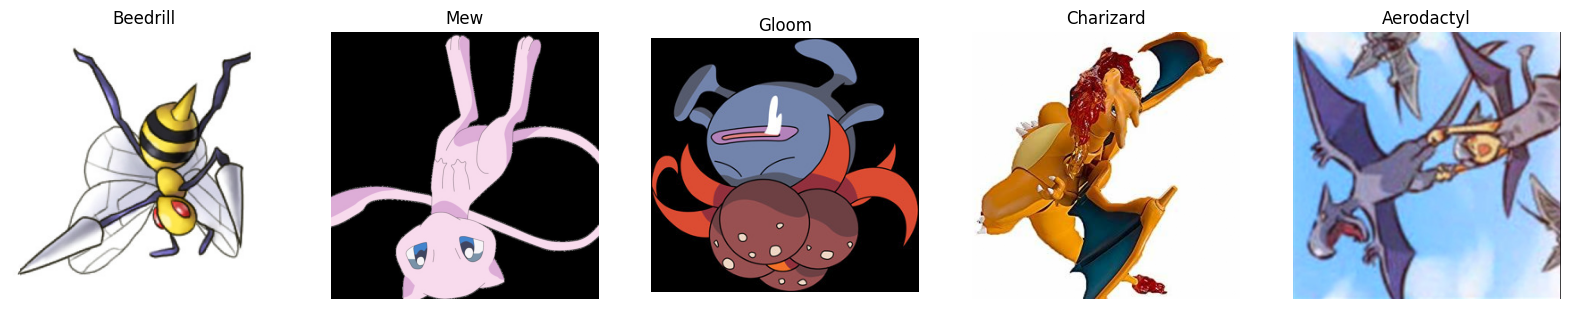

In [2]:


fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = mpimg.imread(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [4]:
print("Getting Training Photos")
#loop through creating dataset that contains [label, path_to_image]
dataset = []
for poke_folder in os.listdir(training_directory):
    print(poke_folder, end=", ")
    for poke_img in os.listdir(training_directory + '/' + poke_folder):
        img = resize_image(training_directory + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])
print("\nDone")
# place training data into x and labels into y
y_train = np.array([poke_dict[x[0]] for x in dataset])
x_train = np.array([x[1] for x in dataset])

# shuffle the lists with same order
zipped = list(zip(x_train, y_train))
random.shuffle(zipped)
x_train, y_train = zip(*zipped)
x_train, y_train = np.array(list(x_train)), np.array(list(y_train))

print("Getting Testing Photos")
dataset = []
for poke_folder in os.listdir(testing_directory):
    print(poke_folder, end=", ")
    for poke_img in os.listdir(testing_directory + '/' + poke_folder):
        img = resize_image(testing_directory + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])
print("\nDone")

y_test = np.array([poke_dict[x[0]] for x in dataset])
x_test = np.array([x[1] for x in dataset])

# shuffle the lists with same order
zipped = list(zip(x_test, y_test))
random.shuffle(zipped)
x_test, y_test = zip(*zipped)
x_test, y_test = np.array(list(x_test)), np.array(list(y_test))

x_test = x_test / 255.0
x_train = x_train / 255.0

print("Reshapping")
# Flatten the image arrays for the MLP input
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.reshape(x_train.shape[0], -1)
print("Done")

x_train = x_train.reshape(x_train.shape[0], 64, 64, 3)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 3)

print(f"Number of training data: {len(y_train)}")
print(f"Number of testing data: {len(y_test)}")



Getting Training Photos
Abra, Aerodactyl, Alakazam, Alolan Sandslash, Arbok, Arcanine, Articuno, Beedrill, Bellsprout, Blastoise, Bulbasaur, Butterfree, Caterpie, Chansey, Charizard, Charmander, Charmeleon, Clefable, Clefairy, Cloyster, Cubone, Dewgong, Diglett, Ditto, Dodrio, Doduo, Dragonair, Dragonite, Dratini, Drowzee, Dugtrio, Eevee, Ekans, Electabuzz, Electrode, Exeggcute, Exeggutor, Farfetchd, Fearow, Flareon, Gastly, Gengar, Geodude, Gloom, Golbat, Goldeen, Golduck, Golem, Graveler, Grimer, Growlithe, Gyarados, Haunter, Hitmonchan, Hitmonlee, Horsea, Hypno, Ivysaur, Jigglypuff, Jolteon, Jynx, Kabuto, Kabutops, Kadabra, Kakuna, Kangaskhan, Kingler, Koffing, Krabby, Lapras, Lickitung, Machamp, Machoke, Machop, Magikarp, Magmar, Magnemite, Magneton, Mankey, Marowak, Meowth, Metapod, Mew, Mewtwo, Moltres, MrMime, Muk, Nidoking, Nidoqueen, Nidorina, Nidorino, Ninetales, Oddish, Omanyte, Omastar, Onix, Paras, Parasect, Persian, Pidgeot, Pidgeotto, Pidgey, Pikachu, Pinsir, Poliwag, Po

In [3]:



model = models.Sequential() 


model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))



model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(.01)))
model.add(Dropout(0.2))
model.add(layers.Dense(151, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        2

In [6]:



history = model.fit(x_train, y_train, epochs=100, 
                    batch_size= 512,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)


Epoch 1/100


C:\Users\scran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


64/64 [==============================] - 108s 2s/step - loss: 10.1485 - accuracy: 0.0655 - val_loss: 7.0077 - val_accuracy: 0.0280
Epoch 2/100
64/64 [==============================] - 106s 2s/step - loss: 4.5165 - accuracy: 0.2386 - val_loss: 4.9905 - val_accuracy: 0.0945
Epoch 3/100
64/64 [==============================] - 107s 2s/step - loss: 3.2355 - accuracy: 0.3903 - val_loss: 4.5907 - val_accuracy: 0.1541
Epoch 4/100
64/64 [==============================] - 106s 2s/step - loss: 2.7682 - accuracy: 0.5068 - val_loss: 4.6432 - val_accuracy: 0.1954
Epoch 5/100
64/64 [==============================] - 107s 2s/step - loss: 2.5378 - accuracy: 0.5959 - val_loss: 4.1901 - val_accuracy: 0.3102
Epoch 6/100
64/64 [==============================] - 107s 2s/step - loss: 2.4234 - accuracy: 0.6623 - val_loss: 3.4243 - val_accuracy: 0.4790
Epoch 7/100
64/64 [==============================] - 106s 2s/step - loss: 2.3424 - accuracy: 0.7140 - val_loss: 3.1394 - val_accuracy: 0.5602
Epoch 8/100
64/64

45/45 [==============================] - 1s 22ms/step


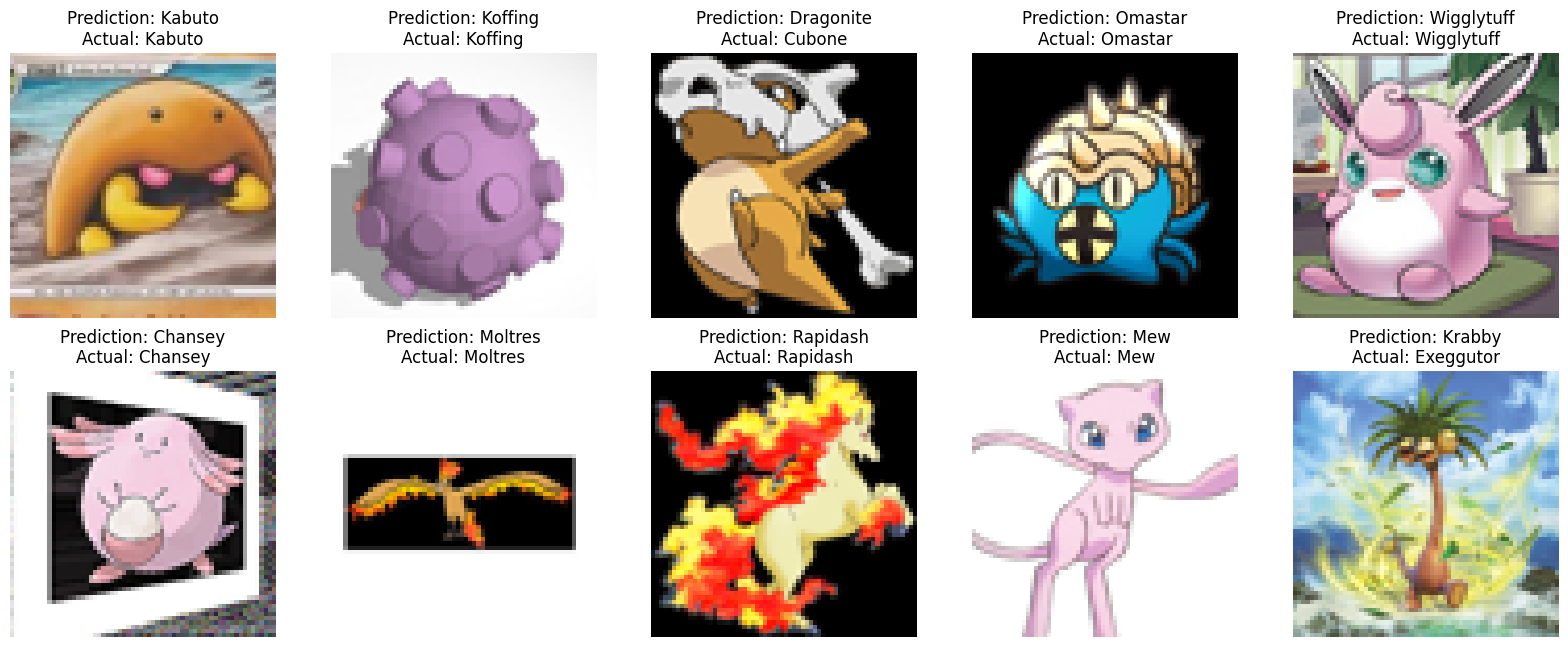

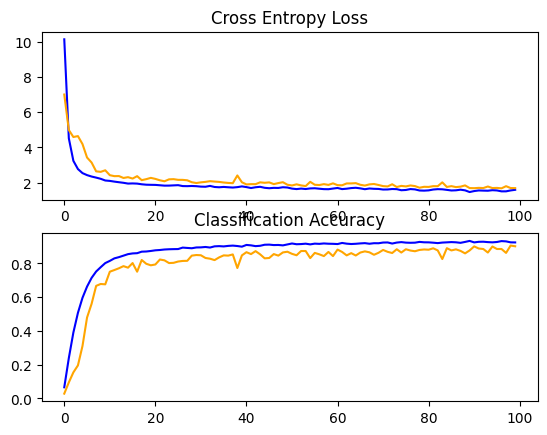

Accuracy for class: Abra         is 100.0 %
Accuracy for class: Aerodactyl   is 71.4 %
Accuracy for class: Alakazam     is 83.3 %
Accuracy for class: Alolan Sandslash is 100.0 %
Accuracy for class: Arbok        is 100.0 %
Accuracy for class: Arcanine     is 66.7 %
Accuracy for class: Articuno     is 77.8 %
Accuracy for class: Beedrill     is 85.7 %
Accuracy for class: Bellsprout   is 87.5 %
Accuracy for class: Blastoise    is 88.9 %
Accuracy for class: Bulbasaur    is 100.0 %
Accuracy for class: Butterfree   is 100.0 %
Accuracy for class: Caterpie     is 100.0 %
Accuracy for class: Chansey      is 100.0 %
Accuracy for class: Charizard    is 85.7 %
Accuracy for class: Charmander   is 90.9 %
Accuracy for class: Charmeleon   is 100.0 %
Accuracy for class: Clefable     is 100.0 %
Accuracy for class: Clefairy     is 100.0 %
Accuracy for class: Cloyster     is 100.0 %
Accuracy for class: Cubone       is 62.5 %
Accuracy for class: Dewgong      is 55.6 %
Accuracy for class: Diglett      is 100

In [79]:
import sys

def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # plt.savefig(filename + '_plot.png')
    # plt.close()




# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in poke_list}
total_pred = {classname: 0 for classname in poke_list}

# Get model predictions on the test set
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Plot the  first 10 images in 2 rows test image and predicted label using Matplotlib, state the prediction vs actual name
plt.figure(figsize=(20, 20))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)

    plt.imshow(x_test[i], cmap=plt.cm.binary)    
    plt.title(f"Prediction: {poke_list[predicted_labels[i]]}\nActual: {poke_list[y_test[i]]}")
    
    plt.axis("off")

plt.savefig("output/predictions.png")
plt.show()

summarize_diagnostics(history)
plt.savefig("output/accuracy.png")
plt.show()

# Collect the correct predictions for each class
for true_label, predicted_label in zip(y_test, predicted_labels):
    true_class = poke_list[true_label]
    if true_label == predicted_label:
        correct_pred[true_class] += 1
    total_pred[true_class] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] != 0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    else:
        accuracy = 0
    print(f'Accuracy for class: {classname:12s} is {accuracy:.1f} %')

# Print overall accuracy
overall_accuracy = 100 * (sum(correct_pred.values()) / sum(total_pred.values()))
print(f'Overall accuracy is {overall_accuracy:.1f} %')



# Save the model

In [3]:
model.save('output/pokemon_classifier.keras')

NameError: name 'model' is not defined

In [17]:

from helper_functions import pick_random_image
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

model = load_model("output/pokemon_classifier.keras")


AttributeError: 'Adam' object has no attribute 'build'

In [1]:

img_path = pick_random_image()
# img_path = "data/custom_set/Charmander/charmander.png"
print(img_path.split("/")[1])

img = resize_image(img_path)
img = img / 255.0
img = img.reshape(1, 64, 64, 3)
plt.axis("Off")
plt.imshow(img[0])

result = model.predict(img)

result = poke_list[np.argmax(result)]
print(f"Prediction {result}")
print("Actual:", img_path.split("/")[2])


NameError: name 'pick_random_image' is not defined